In [1]:
import json
import pandas as pd
from pyarrow import parquet as pq

#### Load in data with json, place in dataframe 

Keys: 
============================

+ `aware_post_type` (string): Ingestion system post type definition. Will be
  either "submission" or "comment" (to a submission or another comment).
+ `aware_created_ts` (timestamp): Ingestion timestamp; e.g.,
  "2023-04-02T13:58:03".
+ `reddit_id` (string): Partial content ID defined by Reddit; e.g., "129sqka".
+ `reddit_name` (string): Full content ID defined by Reddit; e.g., "t3_129sqka".
+ `reddit_created_utc` (integer): UTC timestamp in seconds since the epoch
  recording the time the post was creaed; e.g., 1680458283.
+ `reddit_author` (string): Reddit author username; e.g., "MoodyStarGirl".
+ `reddit_text` (string): Content of the post; e.g., "That's it."
+ `reddit_permalink` (string): Reddit permanent link to the submission or
  comment; e.g.,
  "/r/starbucks/comments/129sqka/hot_chai_lattes_shouldnt_have_water/". Note
  that permalinks use the partial content ID to identify posts.
+ `reddit_title` (string | null): Submission title; e.g., "Hot chai lattes
  shouldn't have water". Will be `null` if the content is a comment to a
  submission or a comment to another comment.
+ `reddit_url` (string | null): Fully-qualified URL to the submission or
  comment; e.g.,
  "https://www.reddit.com/r/starbucks/comments/129sqka/hot_chai_lattes_shouldnt_have_water/".
  Will be `null` if the content is a comment to a submission or a comment to
  another comment.
+ `reddit_subreddit` (string): Subreddit name; e.g., "starbucks".
+ `reddit_link_id` (string | null): Full content ID of a comment's parent
  submission and `null` if the content is a top-level submission.
+ `reddit_parent_id` (string | null): Full content ID of a comment's parent
  submission *or* the parent comment (in the case the content is a comment to a
  comment). Will be `null` if the content is a top-level submission.
+ `reddit_submission` (string | null): Partial content ID of the parent
  submission and `null` if the content is a top-level submission.


In [2]:
import pyarrow.parquet as pq
parquet_file = pq.ParquetFile('../data/reddit.parquet')

reddit_pq = pd.concat((batch.to_pandas() for batch in parquet_file.iter_batches()))
    

In [6]:
reddit_pq.columns

Index(['aware_post_type', 'aware_created_ts', 'reddit_id', 'reddit_name',
       'reddit_created_utc', 'reddit_author', 'reddit_text',
       'reddit_permalink', 'reddit_title', 'reddit_url', 'reddit_subreddit',
       'reddit_link_id', 'reddit_parent_id', 'reddit_submission'],
      dtype='object')

In [8]:
cabin_df = reddit_pq[reddit_pq.reddit_subreddit == 'cabincrewcareers']


In [9]:
cabin_df.iloc[1]

aware_post_type                                                 comment
aware_created_ts                                    2023-12-11T10:48:30
reddit_id                                                       kcwx763
reddit_name                                                  t1_kcwx763
reddit_created_utc                                           1702309710
reddit_author                                               scooterboog
reddit_text           0.5% of applicants get hired. If you NEED to w...
reddit_permalink      /r/cabincrewcareers/comments/18fwe5b/flight_at...
reddit_title                                                       None
reddit_url                                                         None
reddit_subreddit                                       cabincrewcareers
reddit_link_id                                               t3_18fwe5b
reddit_parent_id                                             t3_18fwe5b
reddit_submission                                               

In [17]:
submission_df.loc[:,'reddit_submission'] = submission_df['reddit_id'].copy()

In [20]:
submission_df['reddit_text']

43345    As the title states, I’m trying to find a flig...
43349    Hi all, want to prep my resume for application...
43354    I’m planning on submitting my application to S...
43359    I just have a few questions about being a new ...
43364    I am currently applying to a number of airline...
                               ...                        
23187    Has anyone done the zoom group interview with ...
23194         I got my virtual group invite 🫶🏾 March 22th 
23201    I leave for OO training this month and I’m jus...
23204    Can someone please break down Scheduling and B...
23213    Hello everyone, \nI got invite to emirates int...
Name: reddit_text, Length: 2579, dtype: object

In [19]:
submission_df['reddit_text'].value_counts()

reddit_text
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [13]:
submission_df = cabin_df[cabin_df.aware_post_type == 'submission']
submission_df.loc[:,'reddit_submission'] = submission_df['reddit_id'].copy()

comment_df = cabin_df[cabin_df.aware_post_type == 'comment']

print(submission_df.shape[0]+ comment_df.shape[0])
print(cabin_df.shape[0])

23408
23408


In [11]:
cabin_df[cabin_df.reddit_id == '18fwe5b'].iloc[0]

aware_post_type                                              submission
aware_created_ts                                    2023-12-11T09:57:23
reddit_id                                                       18fwe5b
reddit_name                                                  t3_18fwe5b
reddit_created_utc                                           1702306643
reddit_author                                       Salty-Comedian-5132
reddit_text           As the title states, I’m trying to find a flig...
reddit_permalink      /r/cabincrewcareers/comments/18fwe5b/flight_at...
reddit_title                               Flight attendant job/Looking
reddit_url            https://www.reddit.com/r/cabincrewcareers/comm...
reddit_subreddit                                       cabincrewcareers
reddit_link_id                                                     None
reddit_parent_id                                                   None
reddit_submission                                               

In [6]:
with open('../data/data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [7]:
df = pd.DataFrame(data)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404687 entries, 0 to 404686
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   aware_post_type     404687 non-null  object
 1   aware_created_ts    404687 non-null  object
 2   reddit_id           404687 non-null  object
 3   reddit_name         404687 non-null  object
 4   reddit_created_utc  404687 non-null  int64 
 5   reddit_author       404687 non-null  object
 6   reddit_text         404687 non-null  object
 7   reddit_permalink    404686 non-null  object
 8   reddit_title        23268 non-null   object
 9   reddit_url          23268 non-null   object
 10  reddit_subreddit    404686 non-null  object
 11  reddit_link_id      381418 non-null  object
 12  reddit_parent_id    381418 non-null  object
 13  reddit_submission   381418 non-null  object
dtypes: int64(1), object(13)
memory usage: 43.2+ MB


In [9]:
reddit_pq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5528298 entries, 0 to 23273
Data columns (total 14 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   aware_post_type     object
 1   aware_created_ts    object
 2   reddit_id           object
 3   reddit_name         object
 4   reddit_created_utc  int64 
 5   reddit_author       object
 6   reddit_text         object
 7   reddit_permalink    object
 8   reddit_title        object
 9   reddit_url          object
 10  reddit_subreddit    object
 11  reddit_link_id      object
 12  reddit_parent_id    object
 13  reddit_submission   object
dtypes: int64(1), object(13)
memory usage: 632.7+ MB


In [6]:
reddit_pq.reddit_subreddit.value_counts()

reddit_subreddit
nursing                789499
walmart                630962
sysadmin               557558
starbucks              393597
WaltDisneyWorld        373138
Target                 340401
UPSers                 262483
Disneyland             231981
Lowes                  198805
CVS                    179598
McDonaldsEmployees     174679
cybersecurity          161868
Fedexers               154572
GameStop               137071
starbucksbaristas      132019
fidelityinvestments    129423
Bestbuy                121077
wholefoods              82052
Panera                  79436
DisneyWorld             65549
DollarTree              59745
TjMaxx                  46286
disney                  43954
McLounge                38627
GeneralMotors           37277
TalesFromYourBank       28444
cabincrewcareers        23408
Chase                   16931
KrakenSupport           14533
WalmartEmployees        10752
BestBuyWorkers           5629
RiteAid                  3970
PaneraEmployees        

Text(0.5, 0, 'Subreddit')

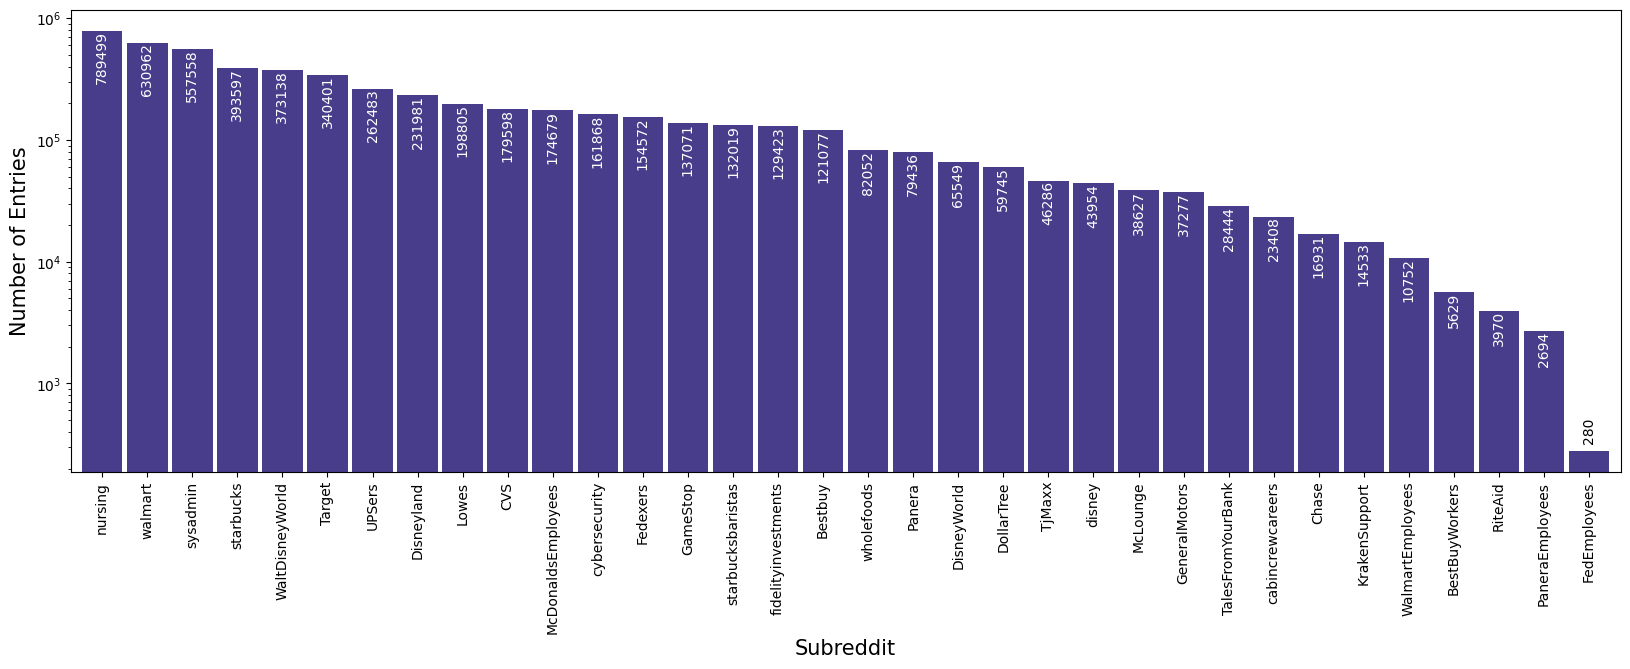

In [40]:
# Construct a bar plot of the number of entries per subreddit using value_counts
from matplotlib import pyplot as plt
f = plt.figure(figsize=(20,6))
reddit_pq.reddit_subreddit.value_counts().plot(kind='bar', width=0.9, color='darkslateblue')
plt.ylabel('Number of Entries', fontsize=15)
# Add totals to the top of the bars
n = len(reddit_pq.reddit_subreddit.value_counts())
for i in range(n):
    if i==n-1:
        plt.text(i, reddit_pq.reddit_subreddit.value_counts()[i]+250, reddit_pq.reddit_subreddit.value_counts()[i], ha = 'center', va = 'top', color='black', rotation=90)
    else:
        plt.text(i, reddit_pq.reddit_subreddit.value_counts()[i], reddit_pq.reddit_subreddit.value_counts()[i], ha = 'center', va = 'top', color='white', rotation=90)

# Add totals to the top of bars inside the bars colored white
# Rotate tick mark labels on the x-axis
#plt.xticks(rotation=45)
plt.yscale('log')
plt.xlabel('Subreddit', fontsize=15)

In [41]:
f.tight_layout()
f.savefig('../figures/subreddit_counts.png', dpi=300)

In [44]:
temp_df = reddit_pq[reddit_pq.aware_post_type=='submission'].reddit_subreddit.value_counts()

In [45]:
temp_df

reddit_subreddit
walmart                37447
nursing                32334
starbucks              24034
sysadmin               21900
Target                 19639
fidelityinvestments    14235
CVS                    13842
WaltDisneyWorld        12463
UPSers                 10732
starbucksbaristas      10383
Lowes                   9407
McDonaldsEmployees      9317
cybersecurity           8829
Bestbuy                 6751
Fedexers                6332
disney                  5785
Disneyland              5695
GameStop                5304
wholefoods              4468
TjMaxx                  4208
DollarTree              4189
Panera                  4004
DisneyWorld             2813
cabincrewcareers        2579
McLounge                2481
KrakenSupport           2407
WalmartEmployees        1854
TalesFromYourBank       1554
Chase                   1479
GeneralMotors           1310
BestBuyWorkers           827
RiteAid                  656
PaneraEmployees          481
FedEmployees             1

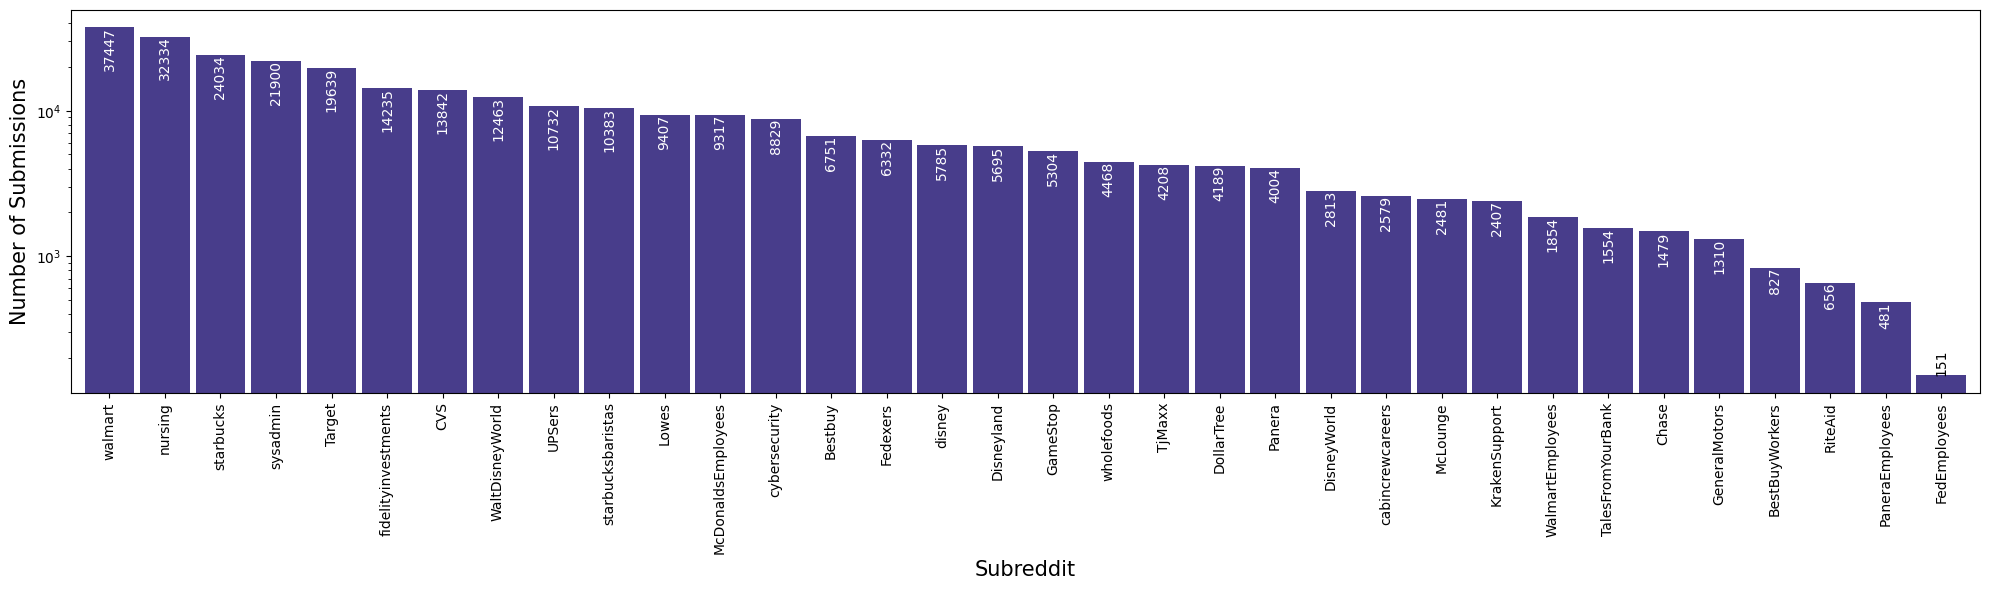

In [53]:
# Construct a bar plot of the number of entries per subreddit using value_counts
from matplotlib import pyplot as plt
f = plt.figure(figsize=(20,6))
temp_df.plot(kind='bar', width=0.9, color='darkslateblue')
plt.ylabel('Number of Submissions', fontsize=15)
# Add totals to the top of the bars
n = len(reddit_pq.reddit_subreddit.value_counts())
for i in range(n):
    if i==n-1:
        plt.text(i, temp_df[i]+75, temp_df[i], ha = 'center', va = 'top', color='black', rotation=90)
    else:
        plt.text(i, temp_df[i], temp_df[i], ha = 'center', va = 'top', color='white', rotation=90)

# Add totals to the top of bars inside the bars colored white
# Rotate tick mark labels on the x-axis
#plt.xticks(rotation=45)
plt.yscale('log')
plt.xlabel('Subreddit', fontsize=15)
f.tight_layout()
f.savefig('../figures/submission_counts.png', dpi=300)

In [8]:
reddit_pq.reddit_subreddit.value_counts().reset_index(drop=False).to_csv('../data/subreddit_counts.csv', index=False)

In [15]:
reddit_pq.reset_index(drop=True).to_feather('../data/reddit.feather')

In [12]:
sbucks = reddit_pq[reddit_pq['reddit_subreddit'] == 'starbucks']

In [ ]:
sbucks

In [3]:
reddit_pq.aware_post_type.value_counts()

aware_post_type
comment       5238408
submission     289890
Name: count, dtype: int64

In [ ]:
df.to_csv('../data/reddit.csv', index=False, encoding='utf-8-sig')

In [4]:
df.reddit_author.value_counts().head(10)

NameError: name 'df' is not defined

In [9]:
starbucks = df[df.reddit_subreddit == 'starbucks'].to_dict(orient='records')

In [9]:
with open('../data/starbucks-subreddit.json', 'w', encoding='utf-8') as f:
    json.dump(starbucks, f)

In [16]:
import sys
print(f'{sys.getsizeof(reddit_pq) / 1024 / 1024}')

6740.837569236755


In [11]:
sys.getsizeof(df) / 1024 / 1024

442.2888593673706

In [13]:
import sys
import json

# Assume 'json_data' is a dictionary loaded from JSON
# For example:

# Calculate the size of the dictionary object
size_dict = sys.getsizeof(data)

# Serialize the dictionary back to a JSON string
json_string = json.dumps(data)

# Calculate the size of the JSON string
size_json_string = sys.getsizeof(json_string)

print("Size of JSON data in dictionary:", size_dict/ 1024 / 1024, "MB")
print("Size of JSON string:", size_json_string/ 1024**2, "MB")

Size of JSON data in dictionary: 3.1401290893554688 MB
Size of JSON string: 261.5390319824219 MB


In [14]:
import sys
import json

# Assume 'json_data' is a dictionary loaded from JSON
# For example:

# Calculate the size of the dictionary object
size_dict = sys.getsizeof(starbucks)

# Serialize the dictionary back to a JSON string
json_string = json.dumps(starbucks)

# Calculate the size of the JSON string
size_json_string = sys.getsizeof(json_string)

print("Size of JSON data in dictionary:", size_dict/ 1024 / 1024, "MB")
print("Size of JSON string:", size_json_string/ 1024**2, "MB")


Size of JSON data in dictionary: 0.29756927490234375 MB
Size of JSON string: 22.70475482940674 MB
